In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [2]:
# reading the data as a pandaaframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
# merge train with test for ease of analysis and feature engineering
df = pd.concat([train, test], ignore_index=True)

df.shape

(72687, 14)

In [4]:
# fill missing values with arbitrary numbers
df['Health Indicator'] = df['Health Indicator'].fillna(-999)
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(-999)
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(-999)

df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
dtype: int64

In [5]:
df.describe(include = 'all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,72687.000000,72687,72687.000000,72687,72687,72687.000000,72687.000000,72687,72687,72687.0,72687.000000,72687.000000,72687.000000,50882.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,10,16.0,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,-999.0,NaN,NaN,NaN,NaN
freq,NaN,12762,NaN,40041,57877,NaN,NaN,60687,18624,28854.0,NaN,NaN,NaN,NaN
mean,36344.000000,NaN,1737.573101,NaN,NaN,44.862713,42.741632,NaN,NaN,NaN,-395.094253,15.122140,14194.856472,0.239947
std,20983.073845,NaN,1428.388402,NaN,NaN,17.293563,17.304194,NaN,NaN,NaN,489.976379,6.329295,6562.564815,0.427055
min,1.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,-999.000000,1.000000,2152.000000,0.000000
25%,18172.500000,NaN,527.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,-999.000000,12.000000,9254.000000,0.000000
50%,36344.000000,NaN,1391.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,1.000000,17.000000,13200.000000,0.000000
75%,54515.500000,NaN,2681.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18144.000000,0.000000


## Exploratory Analysis (Bi variate)
considering the Target `Response`

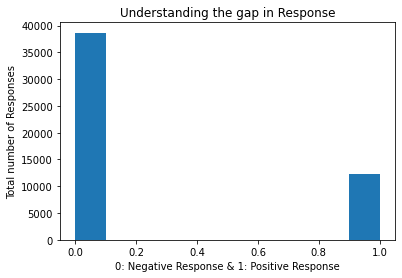

In [6]:
# Understanding the gap in response through chart

plt.hist(df['Response'])
plt.title('Understanding the gap in Response')
plt.xlabel('0: Negative Response & 1: Positive Response')
plt.ylabel('Total number of Responses')
plt.show()


In [7]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,-999,-999.0,22,30510.0,0.0
2,3,C5,3732,Owned,Individual,32,32,No,-999,1.0,1.0,19,7450.0,1.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0


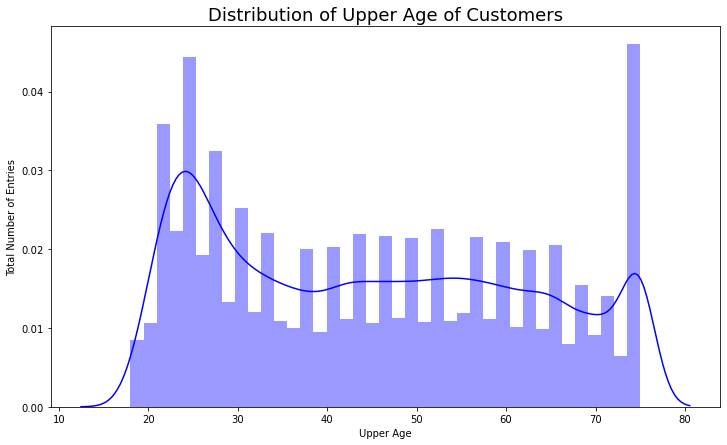

In [8]:
plt.rcParams['figure.figsize'] = [12,7]
sns.distplot(df['Upper_Age'], color = 'blue')
plt.title('Distribution of Upper Age of Customers',  fontsize = 18)
plt.xlabel('Upper Age')
plt.ylabel('Total Number of Entries')
plt.show()

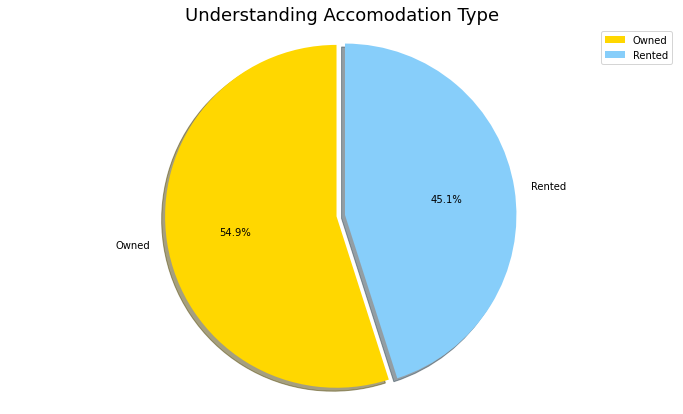

In [9]:
size = [27951, 22931]
labels = 'Owned', 'Rented'
colors = 'gold', 'lightskyblue'
explode = (0.05, 0)

fig1, ax1 = plt.subplots()
ax1.pie(size, labels = labels,startangle = 90,  colors = colors, explode = explode, autopct = '%1.1f%%' , shadow = True)
ax1.axis('equal')
plt.title('Understanding Accomodation Type', fontsize = 18)
plt.legend()
plt.show()

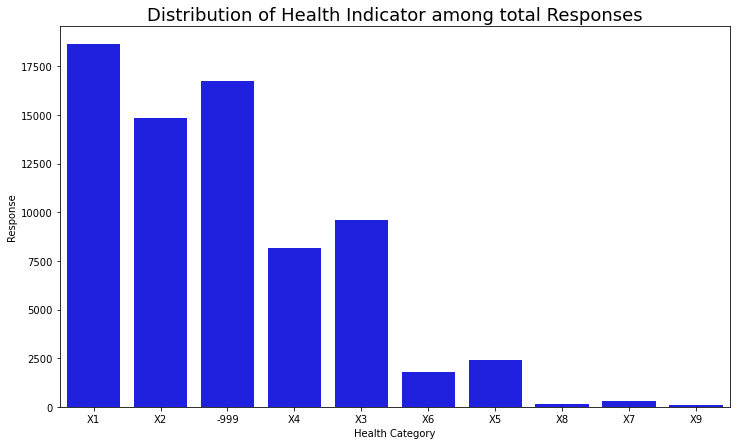

In [10]:
plt.rcParams['figure.figsize'] = [12,7]
sns.countplot(df['Health Indicator'], color = 'blue')
plt.title('Distribution of Health Indicator among total Responses', fontsize =18)
plt.xlabel('Health Category')
plt.ylabel('Response')
plt.show()

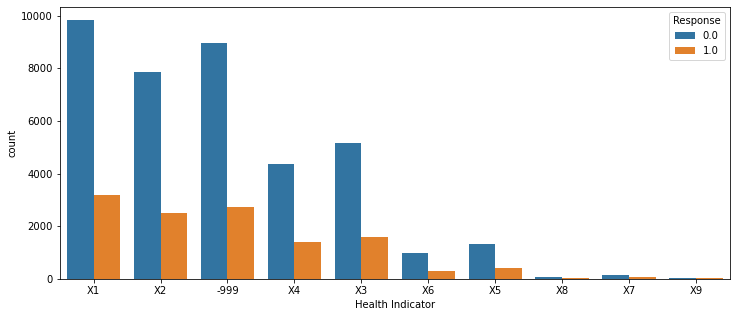

In [11]:
plt.figure(figsize = (12,5))
sns.countplot(df['Health Indicator'],hue = df['Response'])
plt.show()

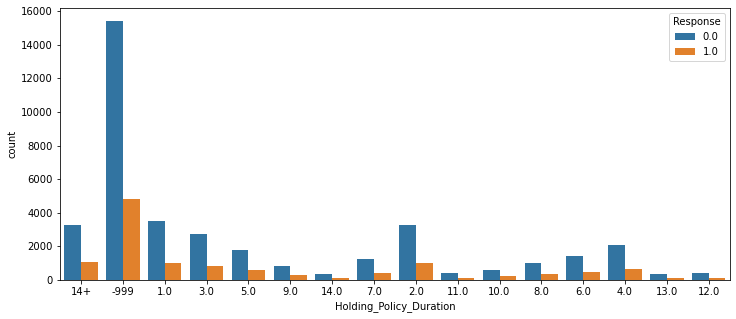

In [12]:
plt.figure(figsize = (12,5))
sns.countplot(df['Holding_Policy_Duration'],hue = df['Response'])
plt.show()

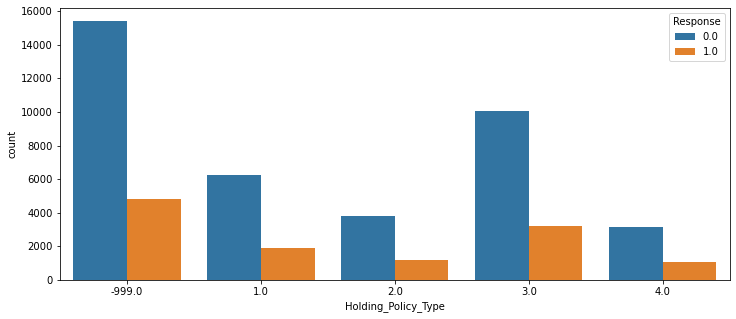

In [13]:
plt.figure(figsize = (12,5))
sns.countplot(df['Holding_Policy_Type'],hue = df['Response'])
plt.show()

<Figure size 864x360 with 0 Axes>

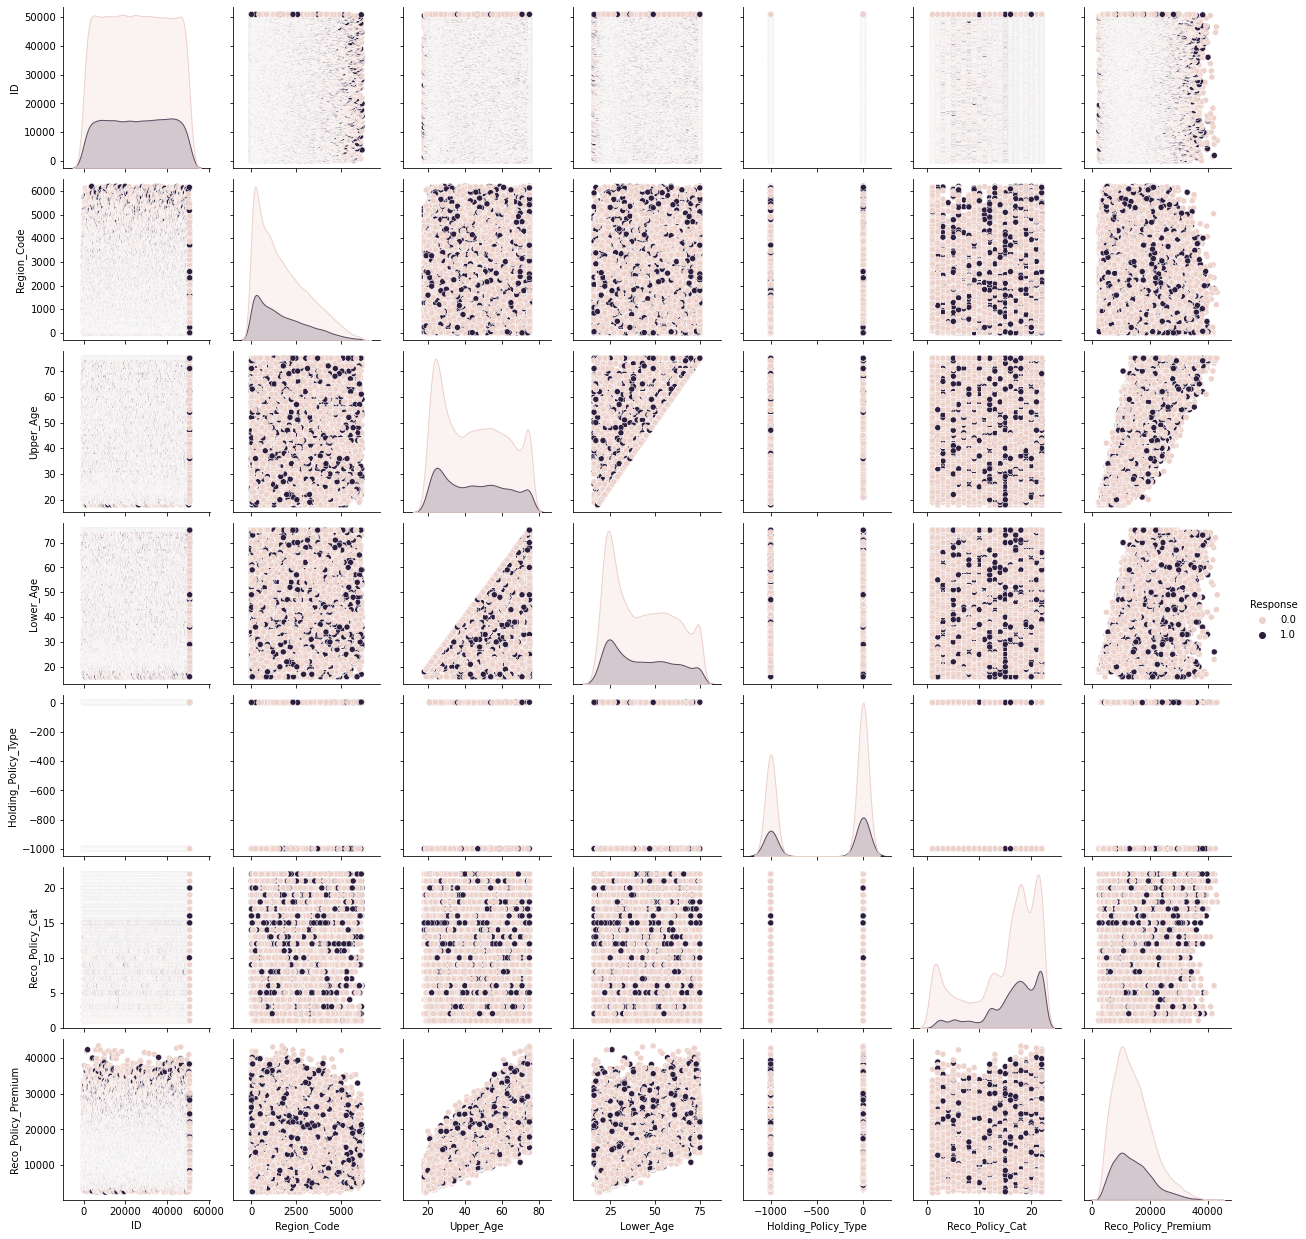

In [14]:
plt.figure(figsize = (12,5))
sns.pairplot(df, hue = 'Response')
plt.show()

In [15]:
df.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,0.004074,0.000066,0.000758,0.001689,0.000315,0.001245,0.005159
Region_Code,0.004074,1.000000,-0.006170,-0.004750,0.000768,-0.062533,-0.013772,0.001121
Upper_Age,0.000066,-0.006170,1.000000,0.921175,0.287205,0.024325,0.791562,0.002772
Lower_Age,0.000758,-0.004750,0.921175,1.000000,0.259862,0.020116,0.613374,-0.002099
Holding_Policy_Type,0.001689,0.000768,0.287205,0.259862,1.000000,0.010190,0.227295,0.001908
Reco_Policy_Cat,0.000315,-0.062533,0.024325,0.020116,0.010190,1.000000,0.060442,0.114321
Reco_Policy_Premium,0.001245,-0.013772,0.791562,0.613374,0.227295,0.060442,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.001908,0.114321,0.007943,1.000000


Text(0.5, 1.0, 'Co-Relation of all features in DataSet')

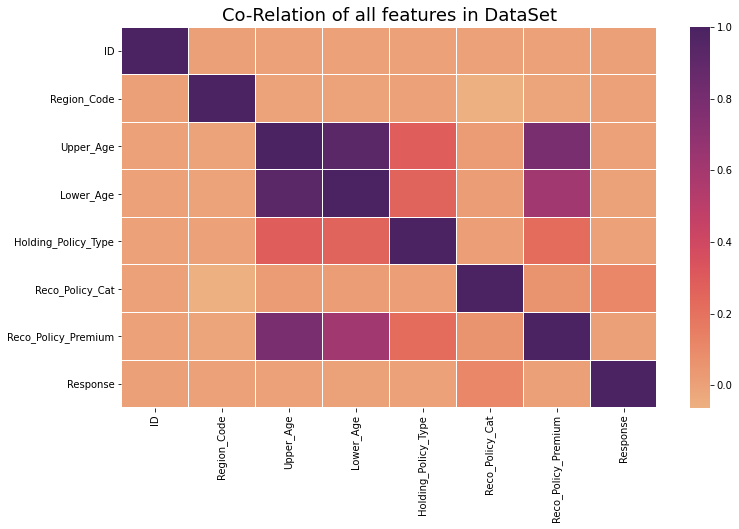

In [16]:
sns.heatmap(df.corr(), cmap="flare", linewidths= 0.03)
plt.title('Co-Relation of all features in DataSet', fontsize = 18)

In [17]:
pd.crosstab(df["Response"], df['Accomodation_Type'], margins=True)

Accomodation_Type,Owned,Rented,All
Response,,,
0.0,21188,17485,38673
1.0,6763,5446,12209
All,27951,22931,50882


In [18]:
pd.crosstab(df["Response"], df['Accomodation_Type'], margins=True)

Accomodation_Type,Owned,Rented,All
Response,,,
0.0,21188,17485,38673
1.0,6763,5446,12209
All,27951,22931,50882


In [19]:
pd.crosstab(df["Response"], df['Reco_Insurance_Type'], margins=True, normalize=True)

Reco_Insurance_Type,Individual,Joint,All
Response,,,
0.0,0.607209,0.152844,0.760053
1.0,0.189458,0.050489,0.239947
All,0.796667,0.203333,1.000000


In [20]:
pd.crosstab(df["Response"], df['Health Indicator'], margins=True, normalize=True)

Health Indicator,-999,X1,X2,X3,X4,X5,X6,X7,X8,X9,All
Response,,,,,,,,,,,
0.0,0.175956,0.193271,0.154102,0.101470,0.085433,0.025923,0.019123,0.002634,0.001179,0.000963,0.760053
1.0,0.053811,0.062419,0.048956,0.031426,0.027436,0.008019,0.006034,0.001219,0.000354,0.000275,0.239947
All,0.229767,0.255690,0.203058,0.132896,0.112869,0.033941,0.025156,0.003852,0.001533,0.001238,1.000000


In [21]:
pd.crosstab(df["Response"], df['Holding_Policy_Duration'], margins=True, normalize=True)


Holding_Policy_Duration,-999,1.0,10.0,11.0,12.0,13.0,14+,14.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
Response,,,,,,,,,,,,,,,,,
0.0,0.302897,0.068826,0.011615,0.008038,0.007527,0.007331,0.063834,0.006898,0.063854,0.054125,0.041351,0.035356,0.028478,0.024016,0.019221,0.016686,0.760053
1.0,0.095102,0.019594,0.004363,0.002693,0.002555,0.002712,0.021363,0.002260,0.019870,0.016352,0.013109,0.011065,0.008746,0.008313,0.006643,0.005208,0.239947
All,0.397999,0.088420,0.015978,0.010731,0.010082,0.010043,0.085197,0.009158,0.083723,0.070477,0.054459,0.046421,0.037223,0.032330,0.025864,0.021894,1.000000


In [22]:
pd.crosstab(df["Response"], df['Holding_Policy_Type'], margins=True, normalize=True)



Holding_Policy_Type,-999.0,1.0,2.0,3.0,4.0,All
Response,,,,,,
0.0,0.302897,0.122755,0.074977,0.197752,0.061672,0.760053
1.0,0.095102,0.037872,0.023387,0.063225,0.020361,0.239947
All,0.397999,0.160627,0.098365,0.260976,0.082033,1.000000


In [23]:
cols_2_drop = ['ID', 'Upper_Age', 'Lower_Age', 'Reco_Insurance_Type']
 
cat_columns = ['City_Code', 'Region_Code', 'Health Indicator', 'Accomodation_Type', 'Reco_Policy_Cat', 'Is_Spouse']

map_reco = {'Individual': 1, 'Joint': 0}
map_accomodation = {'Rented': 0, 'Owned': 1}

def transform_Holding_Policy_Duration(Holding_Policy_Duration):
  df[Holding_Policy_Duration] = df[Holding_Policy_Duration].replace('14+', 15, regex=True).astype(float)
  return df[Holding_Policy_Duration]

# function to calculate feature engineering by aggregating integer columns
def get_agg_by_cols(data, col, agg_list, agg_cols):
    """
    data : dataframe to calculate FE on
    col : list of columns to aggregate by (the object datatype)
    agg_list : a list of statistical measure e.g mean, median
    agg_cols : a list of numerical datatype columns
    """
    for cols in col:
        for i in agg_list:
            for j in agg_cols:
                data[cols+'_'+j+'_'+i] = data.groupby([cols])[j].transform(i)
    return data


In [24]:
columns = ['Health Indicator', 'Reco_Policy_Cat']
agg_list = ['mean', 'std']
agg_cols = ['Reco_Policy_Premium', 'Average_Age']

#feature engineering

In [25]:
df['Average_Age'] = (df['Upper_Age'] + df['Lower_Age']) / 2
df['Reco_Policy_Premium_square'] = df['Reco_Policy_Premium'] ** 2

#transform the data

In [26]:
df = get_agg_by_cols(data=df, col=columns, agg_list=agg_list, agg_cols=agg_cols)
df['Reco_Insurance_Type'] = df['Reco_Insurance_Type'].map(map_reco)
df['Accomodation_Type'] = df['Accomodation_Type'].map(map_accomodation)

df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace('14+', 15, regex=True).astype(float)

df = df.drop(columns=cols_2_drop, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   City_Code                                  72687 non-null  object 
 1   Region_Code                                72687 non-null  int64  
 2   Accomodation_Type                          72687 non-null  int64  
 3   Is_Spouse                                  72687 non-null  object 
 4   Health Indicator                           72687 non-null  object 
 5   Holding_Policy_Duration                    72687 non-null  float64
 6   Holding_Policy_Type                        72687 non-null  float64
 7   Reco_Policy_Cat                            72687 non-null  int64  
 8   Reco_Policy_Premium                        72687 non-null  float64
 9   Response                                   50882 non-null  float64
 10  Average_Age           

#split back into train set and test sets

In [28]:
train_df = df[:len(train)]
test_df = df[len(train):]

test_df.drop('Response', axis=1, inplace=True)


In [30]:
X = train_df.drop('Response', axis=1)
y = train_df['Response'].astype(int)

assert len(X.columns.values) == len(test_df.columns.values)

In [31]:
# !pip install catboost

In [57]:
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
kfold, scores, y_pred_totcb = StratifiedKFold(n_splits=5, shuffle=True, random_state=221), list(), []
for train, test in kfold.split(X, y):
    x_train, x_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    model = CatBoostClassifier(random_state=27,  n_estimators=3000, cat_features = cat_columns,
                               max_depth=7, verbose=500, learning_rate=0.102, eval_metric='AUC')
    model.fit(x_train, y_train, eval_set=(x_test, y_test))
    preds = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, preds)
    scores.append(score)
    print(score)
    test_pred = model.predict_proba(test_df)[:,1]
    y_pred_totcb.append(test_pred)
print("Average: ", sum(scores)/len(scores))

0:	test: 0.5863431	best: 0.5863431 (0)	total: 123ms	remaining: 6m 9s
500:	test: 0.8019069	best: 0.8036775 (219)	total: 57.2s	remaining: 4m 45s
1000:	test: 0.7981717	best: 0.8036775 (219)	total: 1m 59s	remaining: 3m 59s
1500:	test: 0.7949184	best: 0.8036775 (219)	total: 3m 4s	remaining: 3m 4s
2000:	test: 0.7915958	best: 0.8036775 (219)	total: 3m 55s	remaining: 1m 57s
2500:	test: 0.7886654	best: 0.8036775 (219)	total: 4m 34s	remaining: 54.8s
2999:	test: 0.7863331	best: 0.8036775 (219)	total: 5m 12s	remaining: 0us

bestTest = 0.8036774566
bestIteration = 219

Shrink model to first 220 iterations.
0.8036774566186331
0:	test: 0.6123715	best: 0.6123715 (0)	total: 76.8ms	remaining: 3m 50s
500:	test: 0.8015576	best: 0.8028353 (229)	total: 36.9s	remaining: 3m 3s
1000:	test: 0.7991710	best: 0.8028353 (229)	total: 1m 12s	remaining: 2m 25s
1500:	test: 0.7969649	best: 0.8028353 (229)	total: 1m 48s	remaining: 1m 48s
2000:	test: 0.7949054	best: 0.8028353 (229)	total: 2m 23s	remaining: 1m 11s
2500:	te

<AxesSubplot:title={'center':'Feature Importance'}>

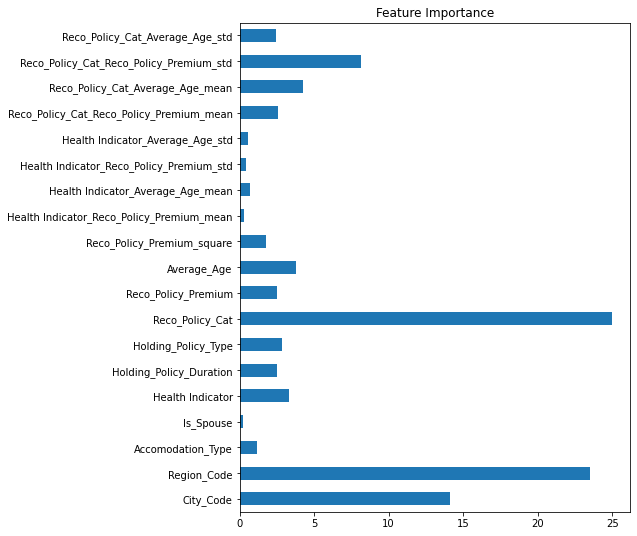

In [58]:
fea_imp = pd.Series(model.feature_importances_, index=X.columns)
fea_imp.plot.barh(figsize=(7, 9), title='Feature Importance')

In [59]:
np.mean(y_pred_totcb, 0)

array([0.0513804 , 0.07820299, 0.4233463 , ..., 0.01399153, 0.53158381,
       0.17515306])

In [70]:
sub = pd.read_csv('sample_submission_QrCyCoT.csv')

In [72]:
sub.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [74]:
sub['Response'] = np.mean(y_pred_totcb, 0)

In [75]:
sub.head()

,ID,Response
0,50883,0.051380
1,50884,0.078203
2,50885,0.423346
3,50886,0.084274
4,50887,0.031551


In [79]:
sub.to_csv('submissionFinal.csv', index=False)